In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import matplotlib.transforms as mtransforms
import string
import seaborn as sns


In [50]:
files = glob.glob('Figs/*.csv')

In [51]:
all_df = {}
for file in files:
    print(file.split('/')[-1].split('_')[0])
    df = pd.read_csv(file)
    if file.split('/')[-1].split('_')[0] =='qd':
        df['Method'] = 'Quickest detection'
    elif file.split('/')[-1].split('_')[0] =='two':
        df['Method'] = '2-sigma'
    elif file.split('/')[-1].split('_')[0] =='logisitc':
        df['Method'] = 'Logistic'
    else:
        df['Method'] = "Kendall's τ"
    all_df[file.split('/')[-1].split('_')[0]] = df

logisitc
two
qd
kendall


In [52]:
df_all = pd.concat(all_df).reset_index()

In [53]:
df_all['Null Model']=df_all['null']

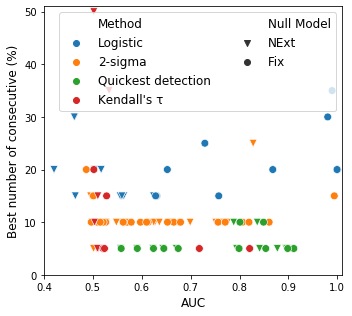

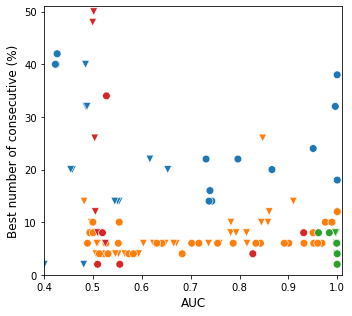

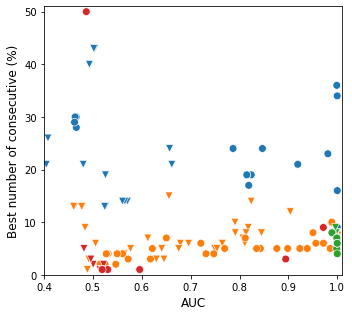

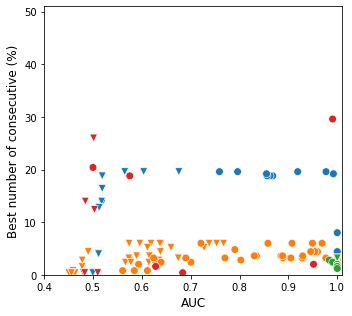

In [54]:
labels = ['A). 20T', 'B). 50T', 'C). 100T', 'D). 250T']
for indexi, length in enumerate([20, 50, 100, 250]):
    if indexi == 0:
        legendhandle = True
    else:
        legendhandle = False
    fig, ax = plt.subplots(1, figsize = (5,4.5))

    chart = sns.scatterplot(data=df_all[df_all['length']==length],
                    x="AUC", y="Best number consecutive (% of time series length)", 
                    hue = 'Method', style="Null Model",markers=['v', 'o'],
                   ax = ax, legend=legendhandle, s = 60)
    if legendhandle:
        handles, labels = ax.get_legend_handles_labels()

        p5, = ax.plot([0], marker='None',
               linestyle='None', label='dummy-tophead')
        handles = list(handles) + [p5]
        labels = list(labels) +['']
        ax.legend(ncol = 2, loc = 'upper right', handles = handles, labels = labels,
                 fontsize = 12)

    ax.set_ylabel('Best number of consecutive (%)', fontsize = 12)
    ax.set_xlabel('AUC', fontsize = 12)
    plt.ylim([0,51
             ])
    plt.xlim([0.4, 1.01])
    fig.tight_layout()
